In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
    import matplotlib.pyplot as plt
    import numpy as np
    import mglearn

In [2]:
X, y = make_moons(n_samples=100, noise=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y,
                                                    random_state=42)

In [3]:
forest = RandomForestClassifier(n_estimators=11, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=11, random_state=2)

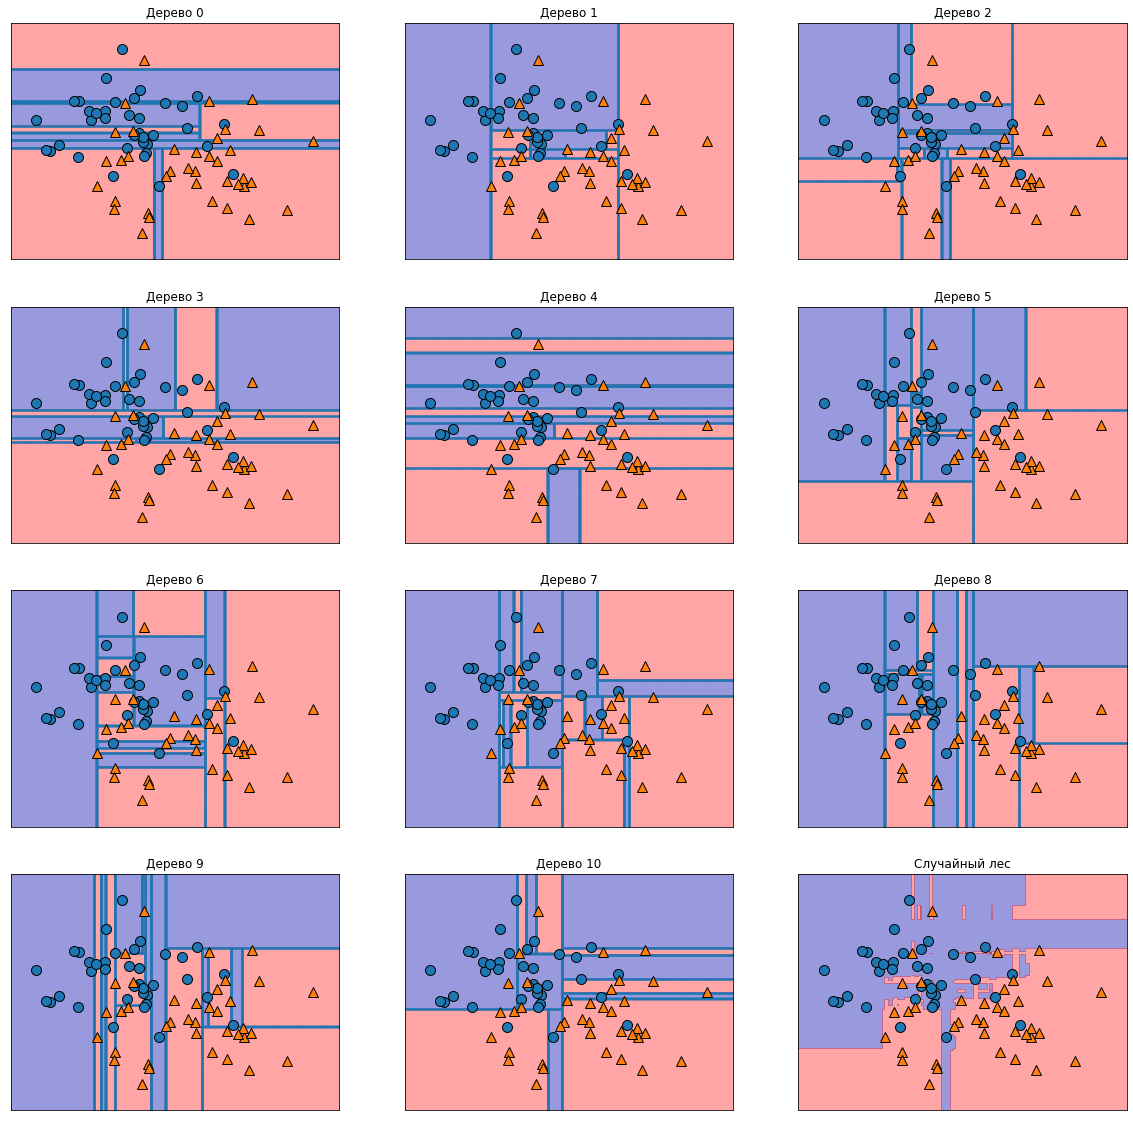

In [4]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Дерево {i}")
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, 
                                X_train, 
                                fill=True,
                                ax=axes[-1, -1],
                                alpha=.4)

axes[-1, -1].set_title("Случайный лес")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [5]:
print(f"R^2 на обучающем наборе: {forest.score(X_train, y_train)}")
print(f"R^2 на тестовом наборе: {forest.score(X_test, y_test)}")

R^2 на обучающем наборе: 0.9466666666666667
R^2 на тестовом наборе: 0.88


In [15]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=42)
forest = RandomForestClassifier(random_state=42, max_features=3, max_depth=5, n_jobs=-1, n_estimators=1000)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=3, n_estimators=1000,
                       n_jobs=-1, random_state=42)

In [16]:
print(f"R^2 на обучающем наборе: {forest.score(X_train, y_train)}")
print(f"R^2 на тестовом наборе: {forest.score(X_test, y_test)}")

R^2 на обучающем наборе: 0.9929577464788732
R^2 на тестовом наборе: 0.972027972027972


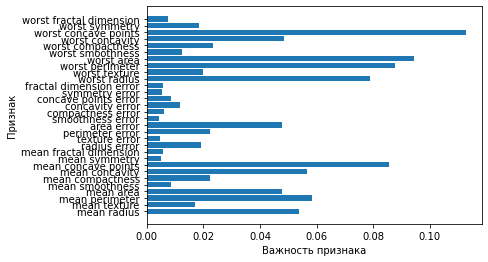

In [17]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(forest)